# Data Analytics ;  Diabetes Dataset

# Business Understanding

-  How many people have diabetes?
-  How many women  are affected by diabetes during pregnancy?
-  What is the average of Glucose for the people who are affected by diabetes?

In [53]:
#import libraries and read the file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
diabetes = pd.read_csv('diabetes.csv')
print(diabetes.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


# Data Understanding

In [54]:
diabetes.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [55]:
diabetes.info() #Use .info() and .describe() to get some insights:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [56]:
#The diabetes data set consists of 768 data points, with 9 features each
print("dimension of diabetes data: {}".format(diabetes.shape))

dimension of diabetes data: (768, 9)


In [57]:

print("dimension of diabetes data: {}".format(diabetes.shape))

dimension of diabetes data: (768, 9)


In [58]:
#How many missing values in the dataset? 
diabetes.isna().sum() 

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [59]:
#how many diplicated rows?
sum(diabetes.duplicated())

0

# Question 1:
How many people have diabetes?

In [60]:
#“Outcome” is the feature for who is affected by diabetes and who's not,
#0 means No diabetes, 1 means diabetes. Of these 768 data points,
#500 are labeled as 0 and 268 as 1:
print(diabetes.groupby('Outcome').size())

Outcome
0    500
1    268
dtype: int64


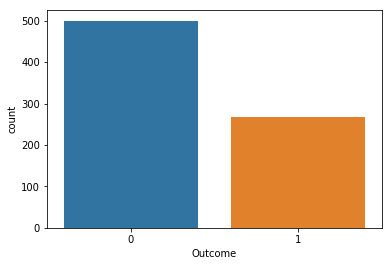

In [61]:
import seaborn as sns
sns.countplot(diabetes['Outcome'],label="Count")

Answer1: In this dataset 268 people who are affected by diabetes.

# Question 2:
How many women are affected by diabetes during pregnancy?

In [62]:
pre= diabetes.groupby("Outcome", as_index=False)['Pregnancies'].sum().sort_values(by="Pregnancies",ascending=False)
display(pre)

,Outcome,Pregnancies
0,0,1649
1,1,1304


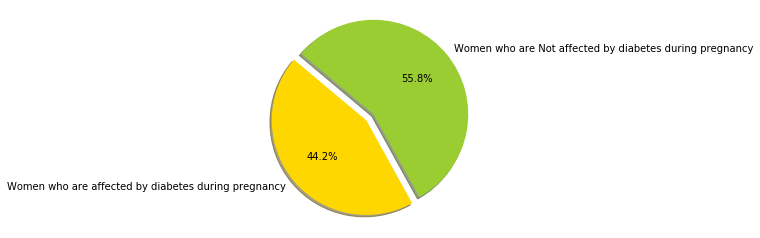

In [63]:
# Data to plot
labels = 'Women who are affected by diabetes during pregnancy', 'Women who are Not affected by diabetes during pregnancy'
sizes = [1304, 1649]
colors = ['gold', 'yellowgreen']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

Answer2: In this dataset 1304 (44.2%)women who are affected by diabetes during pregnancy.

# Question 3:
What is the average of Glucose for the people who are affected by diabetes?

In [64]:
new=pd.DataFrame(diabetes.groupby('Outcome').mean())
display(new)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [65]:
Glucose1= diabetes.groupby("Outcome", as_index=False)['Glucose'].mean().sort_values(by="Glucose",ascending=False)
display(Glucose1)

,Outcome,Glucose
1,1,141.257463
0,0,109.980000


In [66]:
fig2= plx.histogram(Glucose1, x="Outcome", y='Glucose')
fig2.show()

Answer3: The average of Glucose for the people who are affected by diabetes is 141.26